In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

import setting
inputType ='influx' # or file

In [2]:
setting.outlier_param

{'certainOutlierToNaN': {'flag': True},
 'uncertainOutlierToNaN': {'flag': True, 'param': {'neighbor': [0.5, 0.6]}},
 'data_type': 'air'}

In [3]:
# Declare your own data
input_data = setting.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

Data Length: 181319


In [35]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = input_test_data.columns[19]
#column_name = 'in_co2'
input_data =  input_test_data[[column_name]]

partialP = data_preprocessing.packagedPartialProcessing(setting.process_param)
output = partialP.allPartialProcessing(input_data)

getDataWithCertainNaN
getDataWithUncertainNaN
69.40908285972009 83.2908994316641
after Drop NaN Data
===== NaN data Ratio summary ======
in_voc    0.1
dtype: float64
===== NaN data Ratio summary ======
in_voc    0.0
dtype: float64


key:  original Data Leangth: 181319 Data NaN Length: in_voc    616
dtype: int64


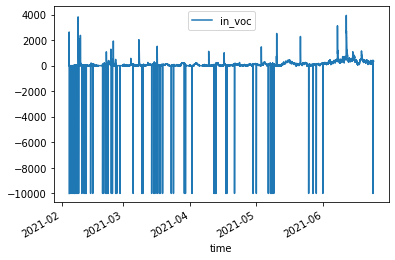

key:  refined_data Data Leangth: 201001 Data NaN Length: in_voc    20298
dtype: int64


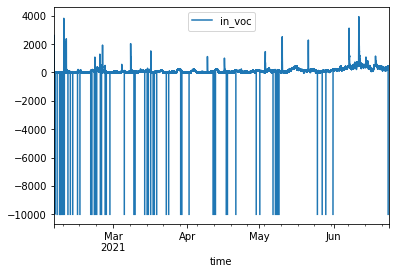

key:  datawithMoreCertainNaN Data Leangth: 201001 Data NaN Length: in_voc    20298
dtype: int64


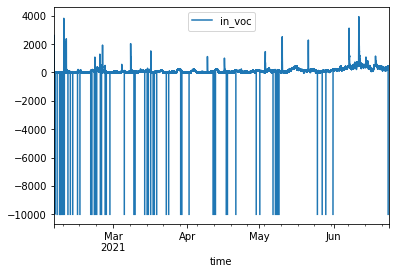

key:  datawithMoreUnCertainNaN Data Leangth: 201001 Data NaN Length: in_voc    20298
dtype: int64


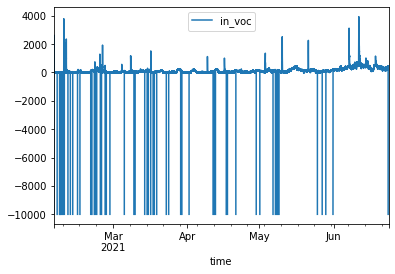

key:  imputed_data Data Leangth: 201001 Data NaN Length: in_voc    153
dtype: int64


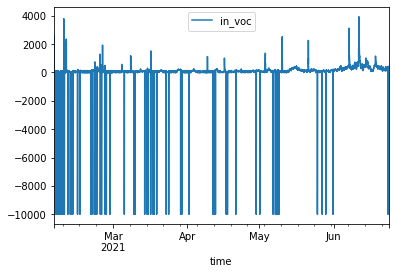

In [36]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()

In [6]:
import pandas as pd
np.random.seed(1997)
df = pd.DataFrame(np.random.choice([np.nan,1], p=(0.8,0.2),size=(10,10)))
print (df)

df1 = df.dropna(thresh=2, axis=1)
print (df1)


     0   1    2    3    4    5    6    7   8    9
0  NaN NaN  NaN  1.0  1.0  NaN  NaN  NaN NaN  NaN
1  1.0 NaN  1.0  NaN  NaN  NaN  NaN  NaN NaN  NaN
2  NaN NaN  NaN  NaN  NaN  1.0  1.0  NaN NaN  NaN
3  NaN NaN  NaN  NaN  1.0  NaN  NaN  NaN NaN  NaN
4  NaN NaN  NaN  NaN  NaN  1.0  NaN  NaN NaN  1.0
5  NaN NaN  NaN  1.0  1.0  NaN  NaN  1.0 NaN  1.0
6  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
7  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
8  NaN NaN  NaN  NaN  NaN  NaN  NaN  1.0 NaN  NaN
9  1.0 NaN  NaN  NaN  1.0  NaN  NaN  1.0 NaN  NaN
     0    3    4    5    7    9
0  NaN  1.0  1.0  NaN  NaN  NaN
1  1.0  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  1.0  NaN  NaN
3  NaN  NaN  1.0  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  NaN  1.0
5  NaN  1.0  1.0  NaN  1.0  1.0
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  1.0  NaN
9  1.0  NaN  1.0  NaN  1.0  NaN
